# Make EDA

In [10]:
#import libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from pycocotools.coco import COCO

#image loader
src_root = './../dataset/'
src_subset = 'subset root of your environment'
src_file = src_root + 'train.json'
src_desc = 'train'


coco_obj = COCO(src_file)

#data load
with open(src_file, 'r') as f:
    root = json.load(f)
    
root.keys() #dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])

#Basic High level infromation
n_images = len(root['images'])
n_boxes = len(root['annotations'])
n_categ = len(root['categories'])

# height, width
heights = [x['height'] for x in root['images']]
widths = [x['width'] for x in root['images']]

print('Dataset Name: ',src_desc)
print('Number of images: ',n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categ)
print('Max min avg height: ', max(heights), min(heights), int(sum(heights)/len(heights)))

print('Max min avg width: ', max(widths), min(widths), int(sum(widths)/len(widths)))

print("It's dictionary of root")
for idx, itm in enumerate (root):
    print("idx : ", idx, "itm : ",itm)

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
Dataset Name:  train
Number of images:  4883
Number of bounding boxes:  23144
Number of classes:  10
Max min avg height:  1024 1024 1024
Max min avg width:  1024 1024 1024
It's dictionary of root
idx :  0 itm :  info
idx :  1 itm :  licenses
idx :  2 itm :  images
idx :  3 itm :  categories
idx :  4 itm :  annotations


In [11]:
for img in root['images'][:3] :
    print(img['file_name'])

train/0000.jpg
train/0001.jpg
train/0002.jpg


# 연습용으로 3개를 해봄 (스케치 단계)

In [12]:
from PIL import Image

imgs_info = dict(heights=[], widths=[], means=[], stds=[])
for img in root['images'][:3]:
    img_path = os.path.join(src_root , img['file_name']) #img_path =  src_root + img['file_name']
    img = np.array(Image.open(img_path)) #이미지를 넘파이로 하나씩 가져옴
    h, w, _ = img.shape
    imgs_info['heights'].append(h)
    imgs_info['widths'].append(w)
    imgs_info['means'].append(img.mean(axis=(0,1)))
    imgs_info['stds'].append(img.std(axis=(0,1)))
print(imgs_info)


prac_info =  dict(mean_heights=0.0, mean_means=0.0, mean_stds=0.0)
prac_info['mean_heights'] = np.mean(imgs_info['heights'], axis=0)
prac_info['mean_means']   = np.mean(imgs_info['means'], axis=0)
prac_info['mean_stds']    = np.mean(imgs_info['stds'], axis=0)

print("\n It's total info \n",prac_info)


{'heights': [1024, 1024, 1024], 'widths': [1024, 1024, 1024], 'means': [array([123.20877457, 119.96605206, 110.15737247]), array([143.84311199, 129.79909039, 116.28131771]), array([61.8362093 , 59.86881828, 63.78875542])], 'stds': [array([38.57945232, 36.10400314, 37.44522527]), array([68.36703357, 67.3385117 , 71.72998143]), array([46.19091083, 49.39959884, 57.96581884])]}

 It's total info 
 {'mean_heights': 1024.0, 'mean_means': array([109.62936529, 103.21132024,  96.74248187]), 'mean_stds': array([51.04579891, 50.94737123, 55.71367518])}


### Example

In [13]:
import numpy as np
a = [1,2,3]
b = [1,2,3]
c = [1,2,3]
lst = []
lst.append(a)
lst.append(b)
lst.append(c)
print(np.mean(lst,axis=0)/255)

[0.00392157 0.00784314 0.01176471]


# Do total imgs

In [17]:
from PIL import Image

imgs_info = dict(heights=[], widths=[], means=[], stds=[])
for img in root['images']:
    img_path = os.path.join(src_root , img['file_name']) #img_path =  src_root + img['file_name']
    img = np.array(Image.open(img_path)) #이미지를 넘파이로 하나씩 가져옴
    h, w, _ = img.shape
    imgs_info['heights'].append(h)
    imgs_info['widths'].append(w)
    imgs_info['means'].append((img.mean(axis=(0,1))/255))
    imgs_info['stds'].append((img.std(axis=(0,1)))/255)


total_info =  dict(mean_heights=0.0, mean_means=0.0, mean_stds=0.0)
total_info['mean_heights'] = np.mean(imgs_info['heights'], axis=0)
total_info['mean_means']   = np.mean(imgs_info['means'], axis=0)
total_info['mean_stds']    = np.mean(imgs_info['stds'], axis=0)

print("\n It's total info \n",total_info)



 It's total info 
 {'mean_heights': 1024.0, 'mean_means': array([0.48490459, 0.46038158, 0.43166834]), 'mean_stds': array([0.21190031, 0.20929289, 0.21483885])}


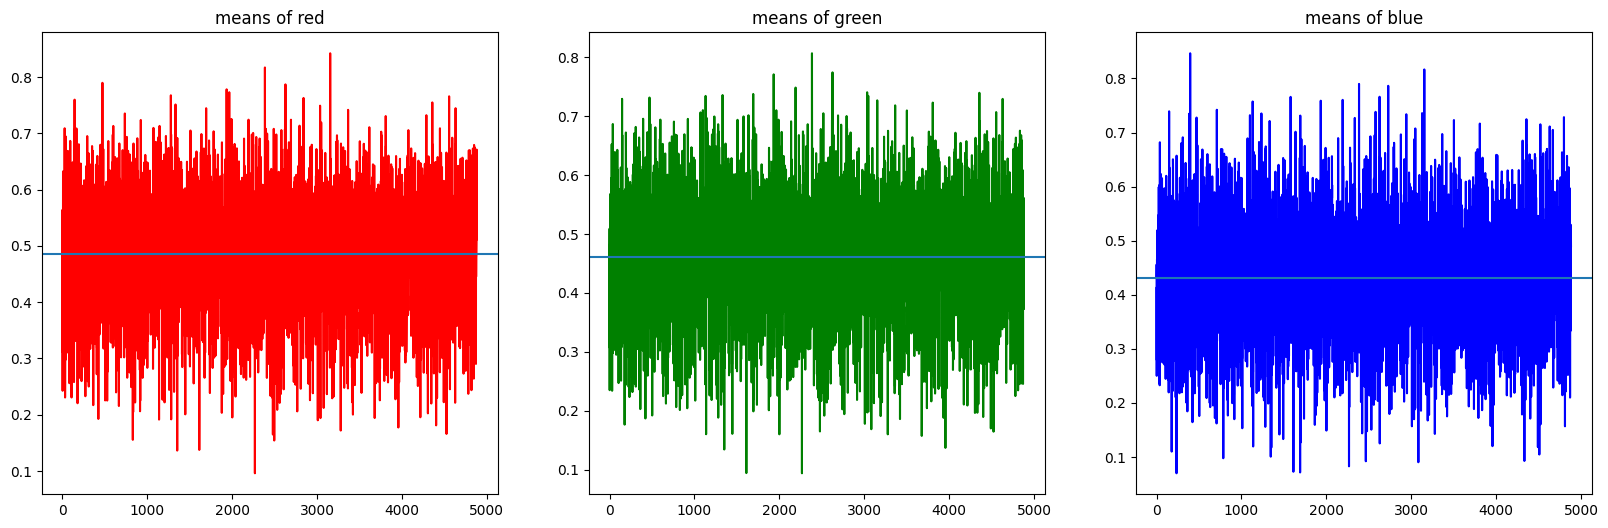

In [15]:
#imgs_info = dict(heights=[], widths=[], means=[], stds=[])
fig, axes = plt.subplots(1, 3, figsize = (20, 6), sharey = False)

colormap = ['red', 'green', 'blue']

red_set, green_set, blue_set = [], [], []
num_color = []

for num,img, in enumerate(imgs_info['means']): #[R,G,B]
    red_set.append(img[0])
    green_set.append(img[1])
    blue_set.append(img[2])
    num_color.append(num)

axes[0].set_title("means of red")
axes[0].plot(num_color,red_set, color = colormap[0])
axes[0].axhline(total_info['mean_means'][0]) #축을 따라 수평선을 표시합니다.

axes[1].set_title("means of green")
axes[1].plot(num_color,green_set, color = colormap[1])
axes[1].axhline(total_info['mean_means'][1]) #축을 따라 수평선을 표시합니다.

axes[2].set_title("means of blue")
axes[2].plot(num_color,blue_set, color = colormap[2])
axes[2].axhline(total_info['mean_means'][2]) #축을 따라 수평선을 표시합니다.
plt.show()

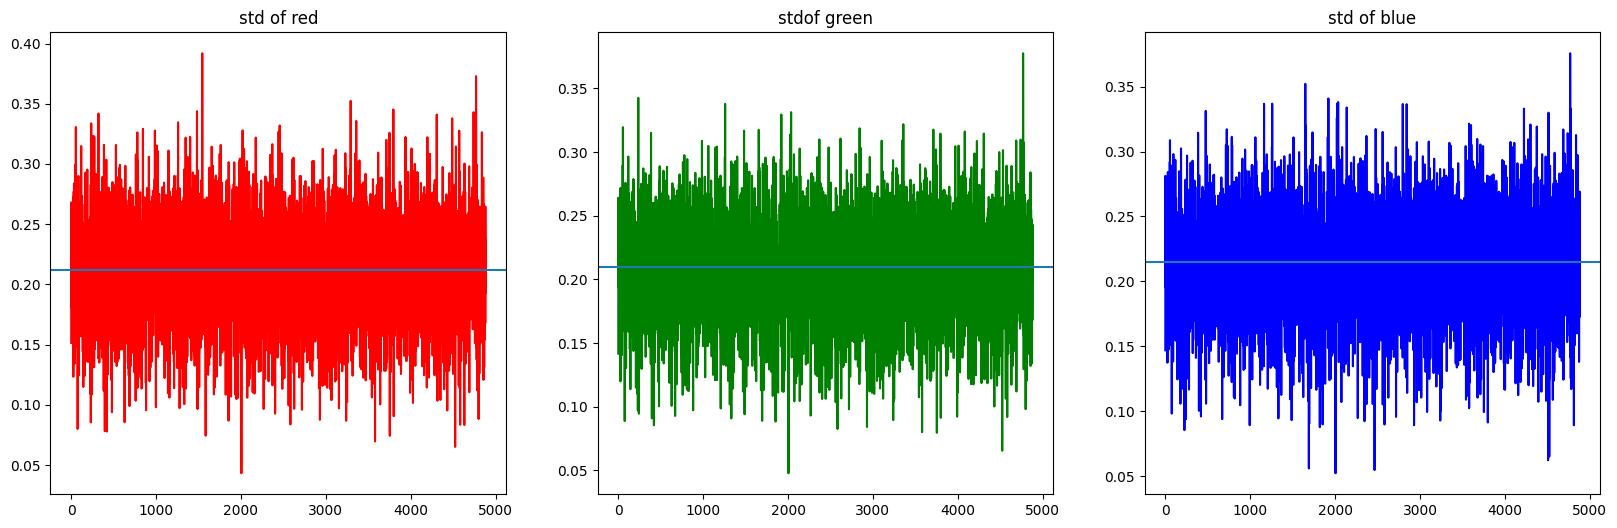

In [16]:
#imgs_info = dict(heights=[], widths=[], means=[], stds=[])
fig, axes = plt.subplots(1, 3, figsize = (20, 6), sharey = False)

colormap = ['red', 'green', 'blue']

red_set, green_set, blue_set = [], [], []
num_color = []

for num,img, in enumerate(imgs_info['stds']): #[R,G,B]
    red_set.append(img[0])
    green_set.append(img[1])
    blue_set.append(img[2])
    num_color.append(num)

axes[0].set_title("std of red")
axes[0].plot(num_color,red_set, color = colormap[0])
axes[0].axhline(total_info['mean_stds'][0]) #축을 따라 수평선을 표시합니다.

axes[1].set_title("stdof green")
axes[1].plot(num_color,green_set, color = colormap[1])
axes[1].axhline(total_info['mean_stds'][1]) #축을 따라 수평선을 표시합니다.

axes[2].set_title("std of blue")
axes[2].plot(num_color,blue_set, color = colormap[2])
axes[2].axhline(total_info['mean_stds'][2]) #축을 따라 수평선을 표시합니다.
plt.show()